<a href="https://colab.research.google.com/github/luthfyzna-gif/UAS_Machine_Learning/blob/main/UAS_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

Load Dataset

In [10]:
df = pd.read_csv('/content/linnerud_physiological.csv', sep=None, engine='python')

Preprocessing : Menentukan Fitur dan Target

In [11]:
# Kita gunakan 'Weight' dan 'Waist' sebagai Fitur (X)
# Kita gunakan 'Pulse' sebagai Target (y).
# Karena ini klasifikasi, kita kategorikan Pulse menjadi 2 kelas (0 dan 1) berdasarkan median.
median_pulse = df['Pulse'].median()
df['Target_Class'] = (df['Pulse'] > median_pulse).astype(int)

X = df[['Weight', 'Waist']]
y = df['Target_Class']

# --- Menampilkan Informasi Dataset ---
print("=== Informasi Dataset ===")
print(f"Jumlah Data  : {df.shape[0]}")
print(f"Jumlah Fitur : {X.shape[1]}")
print(f"Nama Fitur   : {list(X.columns)}")

# Menampilkan distribusi kelas target (0 = Normal/Low, 1 = High)
print("\nDistribusi Kelas Target (0: Low/Normal, 1: High):")
print(y.value_counts())
print("-" * 30)


# 3. Membagi dataset menjadi Training 70% dan Testing 30%
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 4. Feature Scaling menggunakan StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Membuat dan Melatih Model KNN (k=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# 6. Melakukan Prediksi
y_pred = knn.predict(X_test_scaled)

# 7. Menampilkan Metrik Evaluasi
print("\n=== Hasil Evaluasi Model KNN (k=5) ===")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.2%}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Low/Normal', 'High']))

# Opsional: Menampilkan Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

=== Informasi Dataset ===
Jumlah Data  : 20
Jumlah Fitur : 2
Nama Fitur   : ['Weight', 'Waist']

Distribusi Kelas Target (0: Low/Normal, 1: High):
Target_Class
0    10
1    10
Name: count, dtype: int64
------------------------------

=== Hasil Evaluasi Model KNN (k=5) ===
Accuracy Score: 50.00%

Classification Report:
              precision    recall  f1-score   support

  Low/Normal       0.50      0.33      0.40         3
        High       0.50      0.67      0.57         3

    accuracy                           0.50         6
   macro avg       0.50      0.50      0.49         6
weighted avg       0.50      0.50      0.49         6


Confusion Matrix:
[[1 2]
 [1 2]]


Tampilan Metriks Evaluasi

/tmp/ipython-input-894743349.py:34: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-894743349.py:35: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  plt.savefig('evaluation_metrics_visual.png', dpi=300)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


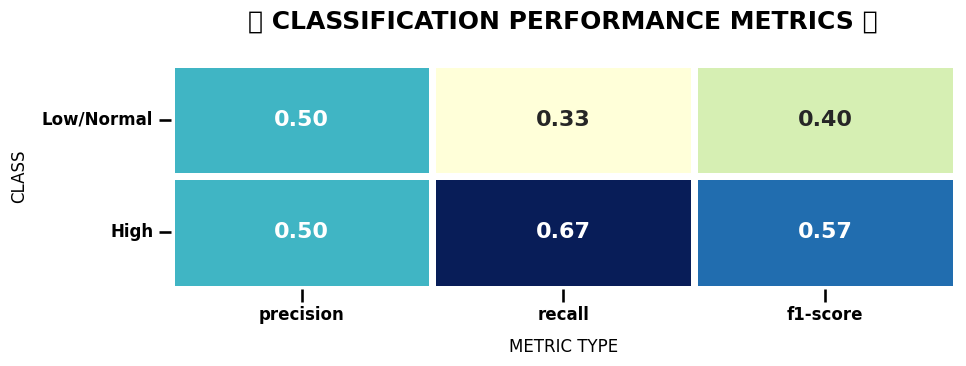


══════════════════════════════════════════
║      🚀 OVERALL ACCURACY: 50.00%       ║
══════════════════════════════════════════


In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score

# 1. Mengambil data report dalam format dictionary
report = classification_report(y_test, y_pred,
                               target_names=['Low/Normal', 'High'],
                               output_dict=True)

# 2. Konversi ke DataFrame dan ambil baris yang relevan saja (Precision, Recall, F1)
df_report = pd.DataFrame(report).iloc[:-1, :2].T

# 3. Visualisasi Metrik (Heatmap Style)
plt.figure(figsize=(10, 4))
sns.set_context("talk")

sns.heatmap(df_report,
            annot=True,
            cmap="YlGnBu",     # Warna Gradasi Hijau-Biru yang elegan
            fmt=".2f",
            cbar=False,
            linewidths=5,
            linecolor='white',
            annot_kws={"size": 16, "weight": "bold"})

# Custom Label & Title
plt.title('✨ CLASSIFICATION PERFORMANCE METRICS ✨', fontsize=18, fontweight='bold', pad=25)
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold', rotation=0)
plt.xlabel('METRIC TYPE', fontsize=12, labelpad=10)
plt.ylabel('CLASS', fontsize=12, labelpad=10)

plt.tight_layout()
plt.savefig('evaluation_metrics_visual.png', dpi=300)
plt.show()

# 4. Tampilan Summary Accuracy (Cool Text Box)
accuracy = accuracy_score(y_test, y_pred)
print("\n" + "═"*42)
print(f"║      🚀 OVERALL ACCURACY: {accuracy:.2%}       ║")
print("═"*42)

Membuat tampilan confussion metrix

/tmp/ipython-input-360485832.py:34: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-360485832.py:35: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.savefig('confusion_matrix_epic.png', dpi=300) # Simpan dengan resolusi tinggi
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


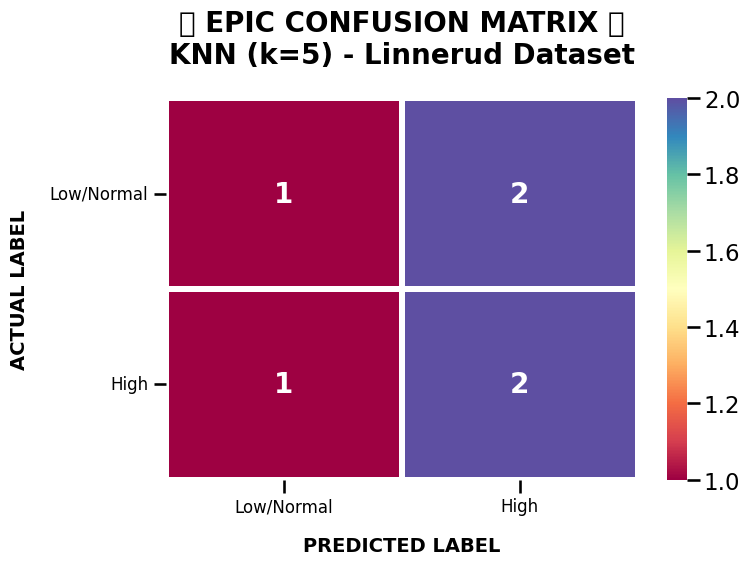

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 1. Menghasilkan Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# 2. Pengaturan Visualisasi
plt.figure(figsize=(8, 6))
sns.set_context("talk") # Membuat elemen teks lebih besar dan jelas

# Membuat heatmap dengan gaya yang lebih keren
labels = ['Low/Normal', 'High']
sns.heatmap(cm,
            annot=True,              # Menampilkan angka di dalam kotak
            fmt='d',                 # Format angka integer
            cmap='Spectral',         # Skema warna epik (Spectral/Viridis/Blues)
            linewidths=3,            # Garis pemisah antar kotak
            linecolor='white',       # Warna garis pemisah
            xticklabels=labels,
            yticklabels=labels,
            cbar=True,               # Menampilkan batang warna
            annot_kws={"size": 20, "weight": "bold"}) # Ukuran angka di dalam kotak

# Menambahkan Label dan Judul yang Informatif
plt.title('🔥 EPIC CONFUSION MATRIX 🔥\nKNN (k=5) - Linnerud Dataset', fontsize=20, fontweight='bold', pad=25)
plt.xlabel('PREDICTED LABEL', fontsize=14, fontweight='bold', labelpad=15)
plt.ylabel('ACTUAL LABEL', fontsize=14, fontweight='bold', labelpad=15)

# Memberikan rotasi pada label agar lebih rapi
plt.xticks(fontsize=12)
plt.yticks(fontsize=12, rotation=0)

plt.tight_layout()
plt.savefig('confusion_matrix_epic.png', dpi=300) # Simpan dengan resolusi tinggi
plt.show()